In [1]:
import transformers
import os
from PIL import Image
import matplotlib.pyplot as plt

/home/whalenlex/.local/share/virtualenvs/jpdf-to-txt-x2aoK0lp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get labels and file paths
file_paths = []
train_img_path = "train_imgs/"
file_paths = sorted(os.listdir(train_img_path))

# Define a custom sorting function to handle numbers naturally
def natural_sort_key(file_name):
    return [int(part) if part.isdigit() else part for part in file_name.split('.')]

# Sort the files using the custom sorting function
file_paths= sorted(file_paths, key=natural_sort_key)

In [3]:
import pandas as pd
df = pd.read_csv('training_labels.csv')

In [4]:
df['path'] = file_paths

In [5]:
def display_img(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

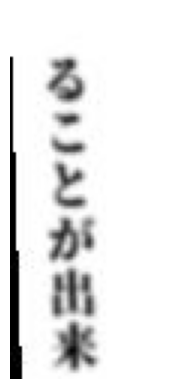

In [6]:
# example of show img
display_img('train_imgs/10.jpg')

In [7]:
def display_img_from_tensor(tens):
    # For example, if you load an image using torchvision, you might have something like:
    # your_tensor = torchvision.io.read_image('your_image_path.jpg')
    # or if you're using a pre-trained model, you might obtain a tensor from the model's output

    # Assuming 'your_tensor' is a 3D tensor (channels, height, width)
    # If it's a 4D tensor (batch_size, channels, height, width), you may need to select a specific batch element
    img_arr = tens.permute(1,2,0).detach().cpu().numpy()
    plt.imshow(img_arr)
    plt.axis('off')
    plt.show()

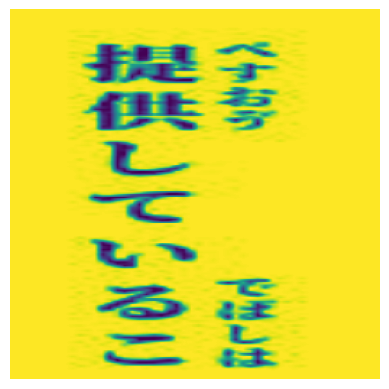

提供しているこ


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named df with columns "path" and "labels"
# Example:
# df = pd.DataFrame({'path': ['image1.jpg', 'image2.jpg', ...], 'labels': ['label1', 'label2', ...]})

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a custom PyTorch dataset
class OCRDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = os.path.join('train_imgs',self.dataframe.iloc[idx]['path'])
        label = self.dataframe.iloc[idx]['labels']

        # Load and preprocess the image
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        if self.transform:
            img = self.transform(img)

        return img, label

# Define transformations (adjust as needed)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Create instances of the dataset for training and validation
train_dataset = OCRDataset(train_df, transform=transform)
val_dataset = OCRDataset(val_df, transform=transform)

# Create PyTorch data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Print the first batch of the training loader
for images, labels in train_loader:
    for image, label in zip(images,labels):
        display_img_from_tensor(image)
        print(label)
        break
    break


In [19]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-char-v2")
model = AutoModelForMaskedLM.from_pretrained("cl-tohoku/bert-base-japanese-char-v2")

pytorch_model.bin: 100%|██████████| 366M/366M [00:11<00:00, 30.5MB/s] 
Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-char-v2 were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("facebook/deit-tiny-patch16-224")
model = AutoModelForImageClassification.from_pretrained("facebook/deit-tiny-patch16-224")

preprocessor_config.json: 100%|██████████| 160/160 [00:00<00:00, 1.51MB/s]
config.json: 100%|██████████| 69.6k/69.6k [00:00<00:00, 35.2MB/s]
pytorch_model.bin: 100%|██████████| 23.0M/23.0M [00:01<00:00, 16.9MB/s]


In [ ]:
encoder_name = 'facebook/deit-tiny-patch16-224'
decoder_name = 'cl-tohoku/bert-base-japanese-char-v2'